In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
full_data = pd.merge(study_results,mouse_metadata,on="Mouse ID")
# Display the data table for preview
full_data.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [13]:
full = full_data.copy()
full_df = pd.DataFrame(full)

In [14]:
# Checking the number of mice.
mouse_id = full_df[['Mouse ID']]
n_mice = mouse_id.nunique()
n_mice

Mouse ID    249
dtype: int64

In [15]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = full_df[full_df.duplicated()][['Mouse ID']]
duplicate_id

,Mouse ID
861,g989


In [16]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_subset = full_df[full_df['Mouse ID'] == "g989"]
g989_subset

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = full_df[full_df['Mouse ID'] != "g989"]
clean_df.head(5)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [18]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## 1. Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

### 1.1 Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
###     mean, median, variance, standard deviation, and SEM of the tumor volume. 
### 1.2 Assemble the resulting series into a single summary DataFrame.

In [68]:
# Get list of drug regimens
regimens = clean_df['Drug Regimen'].unique()
regimens

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

In [20]:
mean = clean_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median = clean_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
variance = clean_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
standard_deviation = clean_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
SEM = clean_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']


summary_table = pd.DataFrame({"Mean Tumor Volume":mean, "Median Tumor Volume":median, "Tumor Volume Variance":variance,
                              "Tumor Volume Standard Deviation":standard_deviation, "Tumor Volume SEM":SEM})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


### 2. Using the aggregation method, produce the same summary statistics in a single line.

In [112]:
aggregate = clean_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem'],
                                                   'Weight (g)':['mean', 'median']})
aggregate

Tumor Volume (mm3)                                            \
                           mean     median        var       std       sem   
Drug Regimen                                                                
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346   
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821   
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236   
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860   
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466   
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331   
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332   
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955   
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111   
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398   

             Weight (g)         
                   mean median  
Drug Regimen                    
Capomulin     19.965217   20.5  
Ceftamin      27.398876   28.0  
Infubinol     27.196629   27.0  
Ketapril      27.861702   28.0  
Naftisol      27.166667   27.0  
Placebo       27.928177   28.0  
Propriva      27.135135   26.0  
Ramicane      19.679825   19.0  
Stelasyn      27.856354   28.0  
Zoniferol     27.692308   28.0

## Bar and Pie Charts

### 3. Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

Text(0.5, 0, 'Drug Regimen')

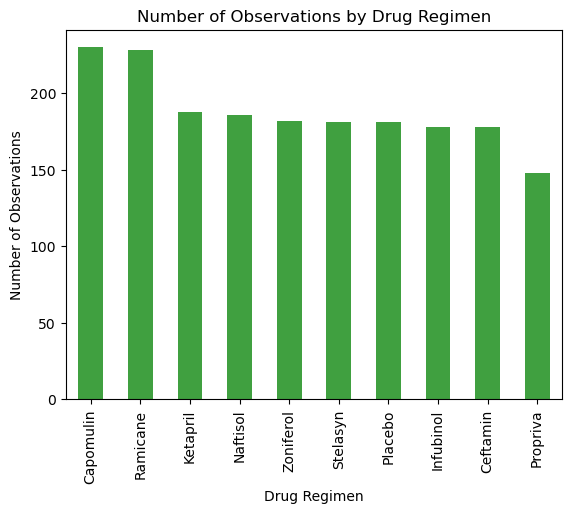

In [116]:
regimens = list(regimens)
n_obs = clean_df['Drug Regimen'].value_counts()

n_obs.plot.bar(color = 'g', alpha = 0.75)
plt.title('Number of Observations by Drug Regimen')
plt.ylabel('Number of Observations')
plt.xlabel('Drug Regimen')

### 3.5 Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

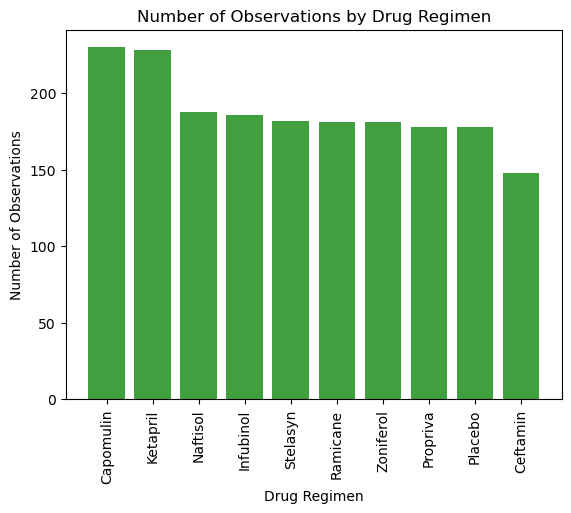

In [118]:
plt.bar(regimens, n_obs, color='g', alpha=0.75, align="center")

plt.title("Number of Observations by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.ylabel("Number of Observations")
plt.show()

### 4. Generate a pie plot showing the distribution of female versus male mice using Pandas

In [99]:
gender = clean_df.groupby(['Sex'])['Mouse ID'].count()
gender

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

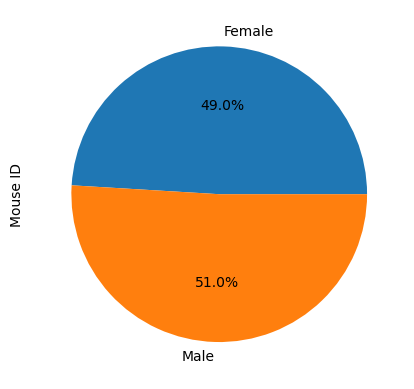

In [107]:
gender.plot.pie(autopct='%1.1f%%')
plt.show()

### 4.5 Generate a pie plot showing the distribution of female versus male mice using pyplot

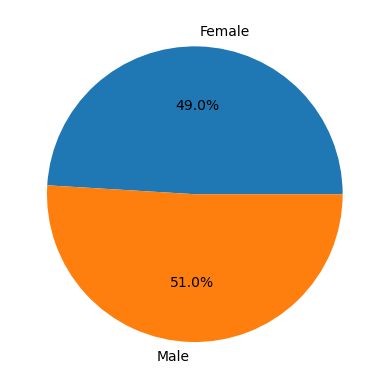

In [106]:
labels = gender.index
sizes = gender.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

### 5. Calculate the final tumor volume of each mouse across four of the treatment regimens:  
### Capomulin, Ramicane, Infubinol, and Ceftamin

### 5.1 Start by getting the last (greatest) timepoint for each mouse


### 5.2 Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [120]:
max_timepoint = clean_df['Timepoint'].max()
max_timepoint

45

In [144]:
of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [146]:
final_tv = clean_df.loc[clean_df['Timepoint'] == 45,:].groupby(['Drug Regimen','Mouse ID']).sum()['Tumor Volume (mm3)'].round(2)


### Find out how to cull the data frame down to only include drug regimens in of_interest


Drug Regimen  Mouse ID
Capomulin     b128        38.98
              b742        38.94
              g288        37.07
              g316        40.16
              i557        47.69
                          ...  
Zoniferol     p136        63.49
              q511        68.61
              q633        70.83
              s337        62.11
              w575        68.40
Name: Tumor Volume (mm3), Length: 130, dtype: float64

### 6. Put treatments into a list for for loop (and later for plot labels)


### 6.1 Create empty list to fill with tumor vol data (for plotting)

In [ ]:
treatments = list(final_tv.index)
tumor_vol_data = []

### 6.2 Calculate the IQR and quantitatively determine if there are any potential outliers. 

### 6.3 Locate the rows which contain mice on each drug and get the tumor volumes
    
    
### 6.4 add subset 
    
    
### 6.5 Determine outliers using upper and lower bounds

### 7. Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

### 8. Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

### 9. Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

### 10. Calculate the correlation coefficient and linear regression model 
### for mouse weight and average tumor volume for the Capomulin regimen